In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ConcreteStrength = pd.read_csv("ConcreteStrength.csv")

In [3]:

ConcreteStrength = ConcreteStrength.drop(ConcreteStrength.columns[[-1,-2,-3]], axis = 1)


In [4]:

import warnings
warnings.filterwarnings("ignore", message="eggnog")


In [5]:
ConcreteStrength.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Air Entrainment,Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820


In [6]:
ConcreteStrength.isnull().sum()

No                                    0
Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
Air Entrainment                       0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [7]:
ConcreteStrength.columns.tolist()

['No',
 'Cement',
 'Slag',
 'Fly ash',
 'Water',
 'SP',
 'Coarse Aggr.',
 'Fine Aggr.',
 'Air Entrainment',
 'Compressive Strength (28-day)(Mpa)']

In [8]:
ConcreteStrength = ConcreteStrength.rename(columns = {'Fly ash' : 'FlyAsh', 'Coarse Aggr.' : 'CoarseAgg','Fine Aggr.' : 'FineAgg','Air Entrainment' : 'AirEntrain', 'Compressive Strength (28-day)(Mpa)' :'Strength'})

In [9]:
ConcreteStrength.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820


In [10]:
ConcreteStrength['AirEntrain']=ConcreteStrength['AirEntrain'].astype('category') 
ConcreteStrength.describe(include='category')

,AirEntrain
count,103
unique,2
top,No
freq,56


In [11]:
ConcreteStrength.describe

<bound method NDFrame.describe of       No  Cement   Slag  FlyAsh  Water    SP  CoarseAgg  FineAgg AirEntrain  \
0      1   273.0   82.0   105.0  210.0   9.0      904.0    680.0         No   
1      2   163.0  149.0   191.0  180.0  12.0      843.0    746.0        Yes   
2      3   162.0  148.0   191.0  179.0  16.0      840.0    743.0        Yes   
3      4   162.0  148.0   190.0  179.0  19.0      838.0    741.0         No   
4      5   154.0  112.0   144.0  220.0  10.0      923.0    658.0         No   
..   ...     ...    ...     ...    ...   ...        ...      ...        ...   
98    99   248.3  101.0   239.1  168.9   7.7      954.2    640.6         No   
99   100   248.0  101.0   239.9  169.1   7.7      949.9    644.1         No   
100  101   258.8   88.0   239.6  175.3   7.6      938.9    646.0        Yes   
101  102   297.1   40.9   239.9  194.0   7.5      908.9    651.8        Yes   
102  103   348.7    0.1   223.1  208.5   9.6      786.2    758.1         No   

     Strength  
0

In [12]:
ConcreteStrength.columns.tolist()

['No',
 'Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'SP',
 'CoarseAgg',
 'FineAgg',
 'AirEntrain',
 'Strength']

## 3.1 Plotting the dataset

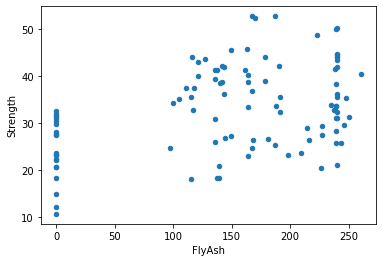

In [13]:
ConcreteStrength.plot.scatter(x = 'FlyAsh', y = 'Strength')
plt.show()

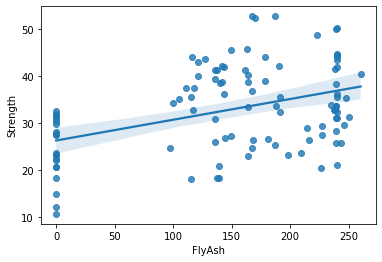

In [14]:

sns.regplot(x = 'FlyAsh', y='Strength', data = ConcreteStrength)
plt.show()

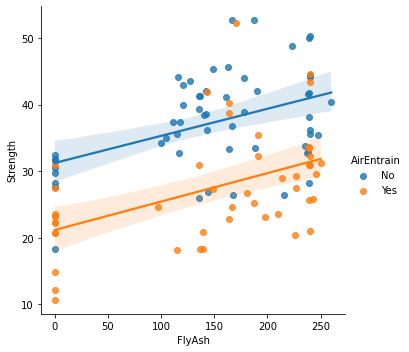

In [15]:

sns.lmplot(x='FlyAsh', y='Strength', hue='AirEntrain', data=ConcreteStrength)
plt.show()


In [16]:
from scipy import stats
stats.pearsonr(ConcreteStrength['Strength'],ConcreteStrength['FlyAsh'])

(0.4063870105954507, 2.0500713273946373e-05)

In [17]:
cormat=ConcreteStrength.corr()
round(cormat, 2)


,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
No,1.00,-0.03,-0.08,0.34,-0.14,-0.33,0.22,-0.31,0.19
Cement,-0.03,1.00,-0.24,-0.49,0.22,-0.11,-0.31,0.06,0.46
Slag,-0.08,-0.24,1.00,-0.32,-0.03,0.31,-0.22,-0.18,-0.33
FlyAsh,0.34,-0.49,-0.32,1.00,-0.24,-0.14,0.17,-0.28,0.41
Water,-0.14,0.22,-0.03,-0.24,1.00,-0.16,-0.60,0.11,-0.22
SP,-0.33,-0.11,0.31,-0.14,-0.16,1.00,-0.10,0.06,-0.02
CoarseAgg,0.22,-0.31,-0.22,0.17,-0.60,-0.10,1.00,-0.49,-0.15
FineAgg,-0.31,0.06,-0.18,-0.28,0.11,0.06,-0.49,1.00,-0.17
Strength,0.19,0.46,-0.33,0.41,-0.22,-0.02,-0.15,-0.17,1.00


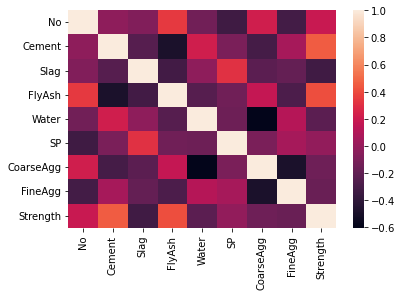

In [18]:
sns.heatmap(cormat);


In [19]:
ConcreteStrength.rename(columns={'Fly ash':'FlyAsh','Coarse Aggr.':"CoarseAgg",'Fine Aggr.':'FineAgg',
 'Air Entrainment': 'AirEntrain','Compressive Strength (28-day)(Mpa)':'Strength'},inplace = True)
ConcreteStrength['AirEntrain']=ConcreteStrength['AirEntrain'].astype('category')
ConcreteStrength.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820


## 3.2 Statistical Analysis


In [20]:
import statsmodels.api as sm
Y = ConcreteStrength['Strength']
X = ConcreteStrength['FlyAsh']
X.head()


0    105.0
1    191.0
2    191.0
3    190.0
4    144.0
Name: FlyAsh, dtype: float64

In [21]:

# We can consider using the constant(X) to validate our output
X =sm.add_constant(X)
X.head()


,const,FlyAsh
0,1.0,105.0
1,1.0,191.0
2,1.0,191.0
3,1.0,190.0
4,1.0,144.0


In [22]:

# Now that we have analyzed that stats, let us generate yet another summary of the stats while dropping missing
model=sm.OLS(Y, X, missing='drop')
model_result =model.fit()
model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     19.98
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.05e-05
Time:                        21:27:07   Log-Likelihood:                -365.58
No. Observations:                 103   AIC:                             735.2
Df Residuals:                     101   BIC:                             740.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2764      1.691     15.543      0.000      22.923      29.630
FlyAsh         0.0440      0.010      4.470      0.000       0.024       0.064
==============================================================================
Omnibus:                        5.741   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                2.716
Skew:                           0.064   Prob(JB):                        0.257
Kurtosis:                       2.215   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.3 Distribution Stats


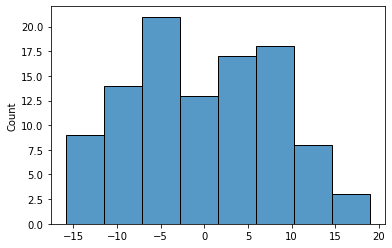

In [23]:

# Okay, we can now begin creating graphs to aid our data narrative.

sns.histplot(x=model_result.resid);




In [24]:

# Great! let us check more stats to verify our standard deviation from the mean.
# This code is broken and needs fixed to generate output below.
from scipy import stats
mu, std=stats.norm.fit(model_result.resid)
mu,std


# check this

(-1.283116008265812e-14, 8.418278511304978)

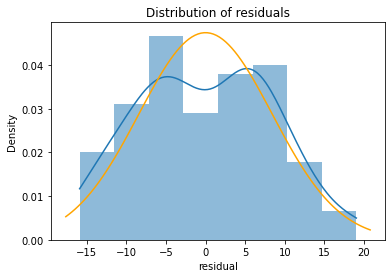

In [25]:
# Awesome! Data is as pretty as it can be presented by neat visuals such as....
fig, ax = plt.subplots()
sns.histplot(x=model_result.resid, ax = ax, stat='density', linewidth=0, kde=True)
ax.set(title='Distribution of residuals', xlabel='residual')
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='orange', ax=ax)
plt.show()


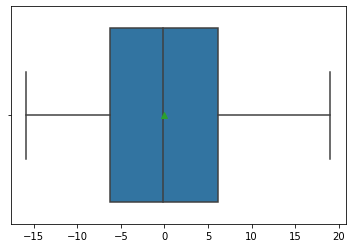

In [26]:

# Great work so far, we can now compare the two different graphs using...

sns.boxplot(x=model_result.resid, showmeans=True);


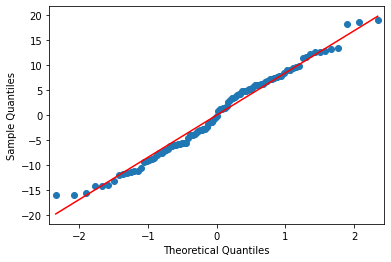

In [27]:

sm.qqplot(model_result.resid, line='s');

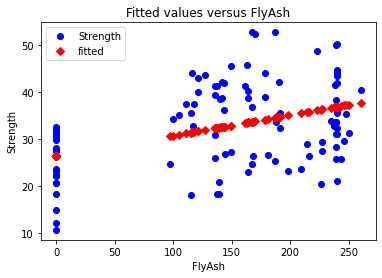

In [28]:

# Now, we can use the fitted values to derive our output to measure strength vs FlyAsh
sm.graphics.plot_fit(model_result,1,vlines=False);


In [29]:

# Here are the fitted results in order based on the model
model_result.fittedvalues


0      30.901424
1      34.689565
2      34.689565
3      34.645517
4      32.619302
         ...    
98     36.808282
99     36.843520
100    36.830306
101    36.843520
102    36.103511
Length: 103, dtype: float64

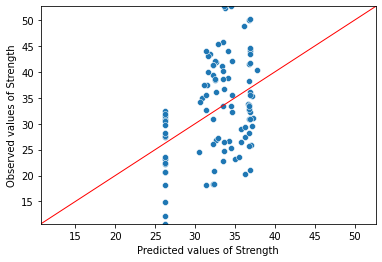

In [30]:

# Let us begin by defining the variables X and y and then plot using seaborn
Y_max = Y.max()
Y_min = Y.min()
ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted values of Strength")
ax.set_ylabel("Observed values of Strength")
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color= 'red', linewidth=1)
plt.show()


In [31]:
ConcreteStrength.head(3)

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450


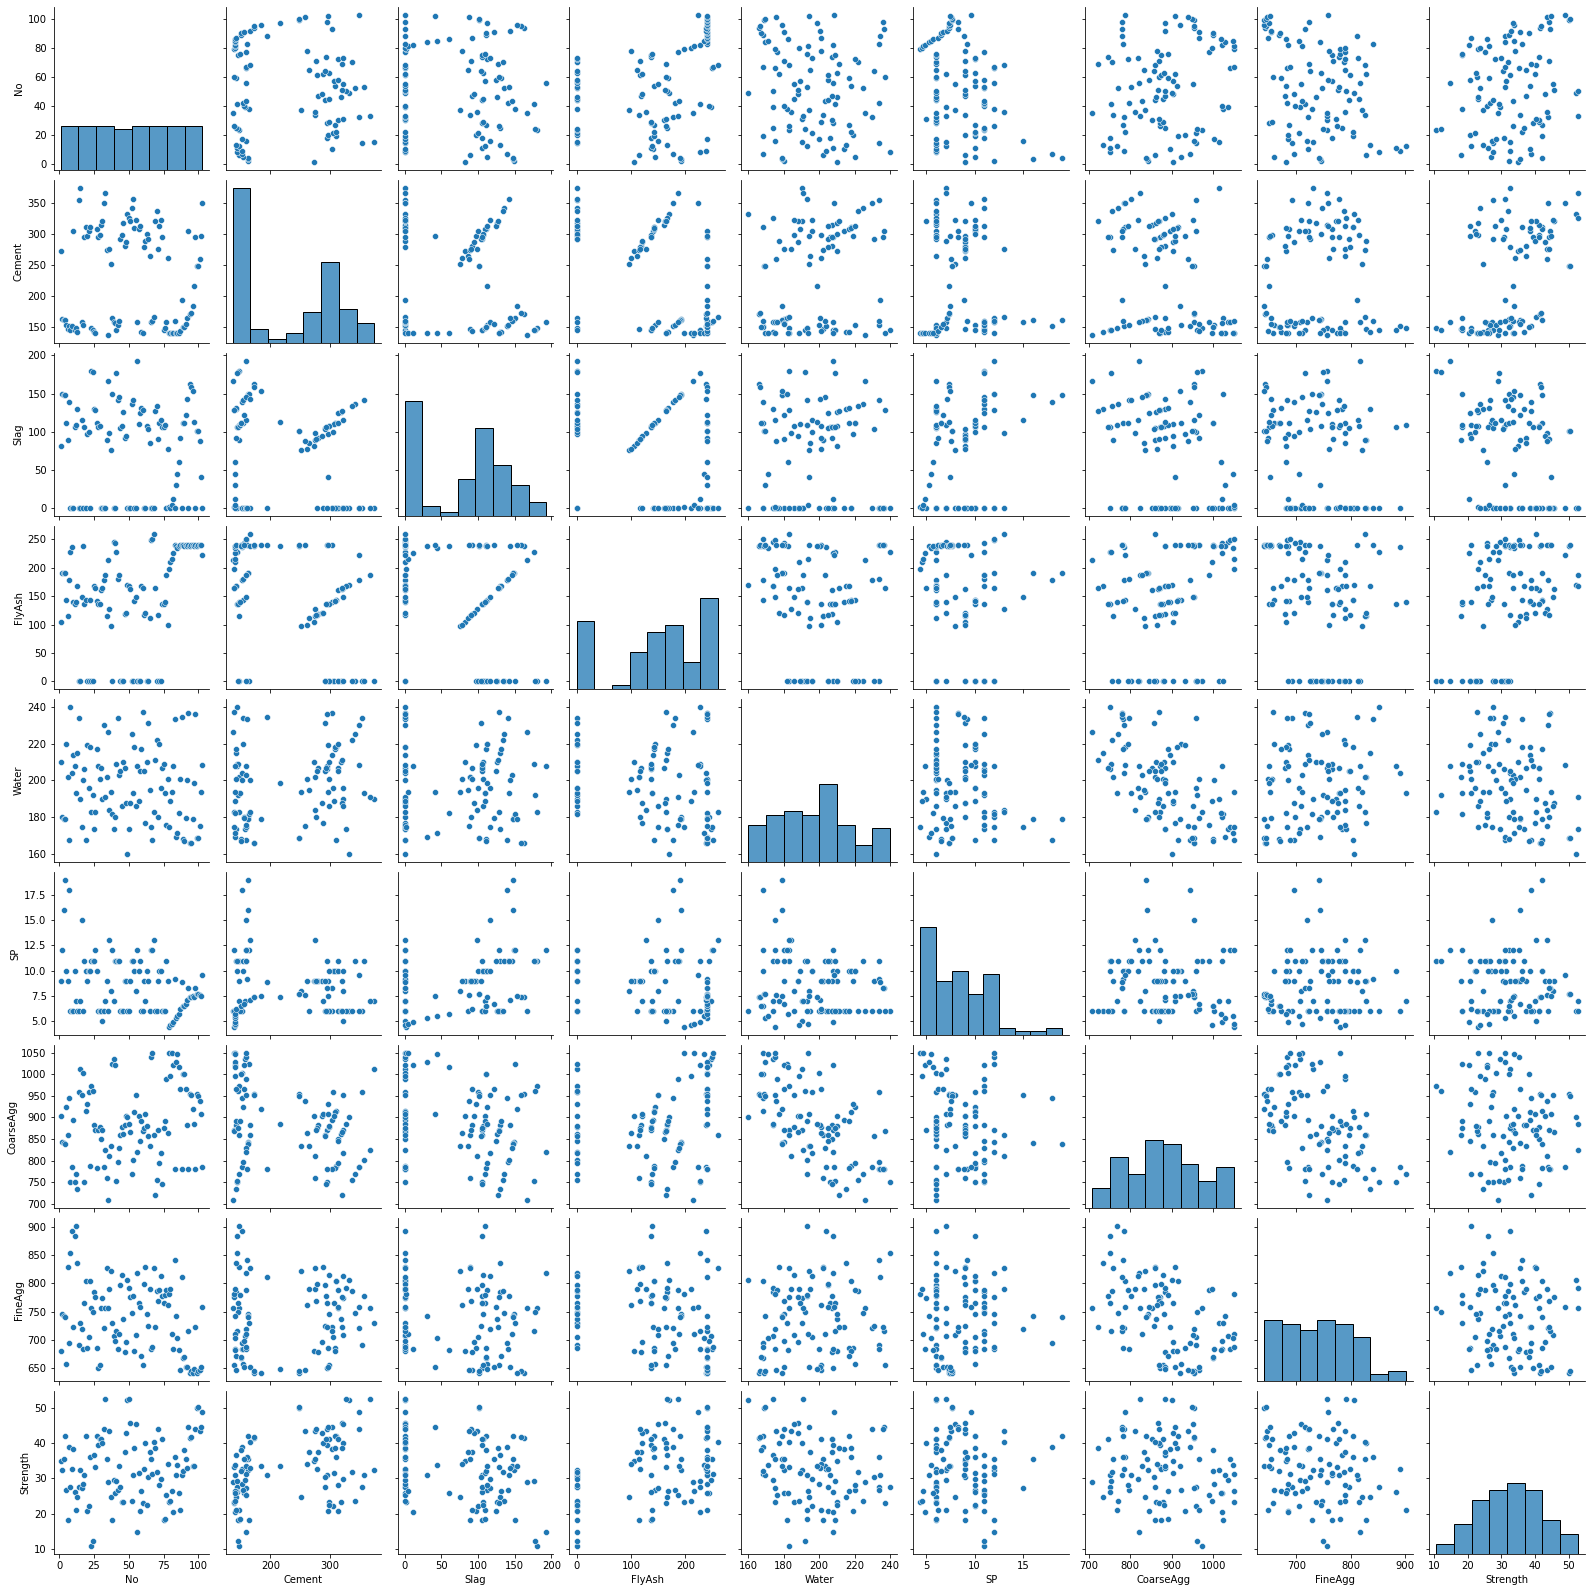

In [32]:

Y = ConcreteStrength['Strength']
X = ConcreteStrength[['No',
 'Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'SP',
 'CoarseAgg',
 'FineAgg']]
X = sm.add_constant(X)

data = pd.concat([pd.DataFrame(X).iloc[:, 1:], Y], axis=1)
sns.pairplot(data)
plt.show()


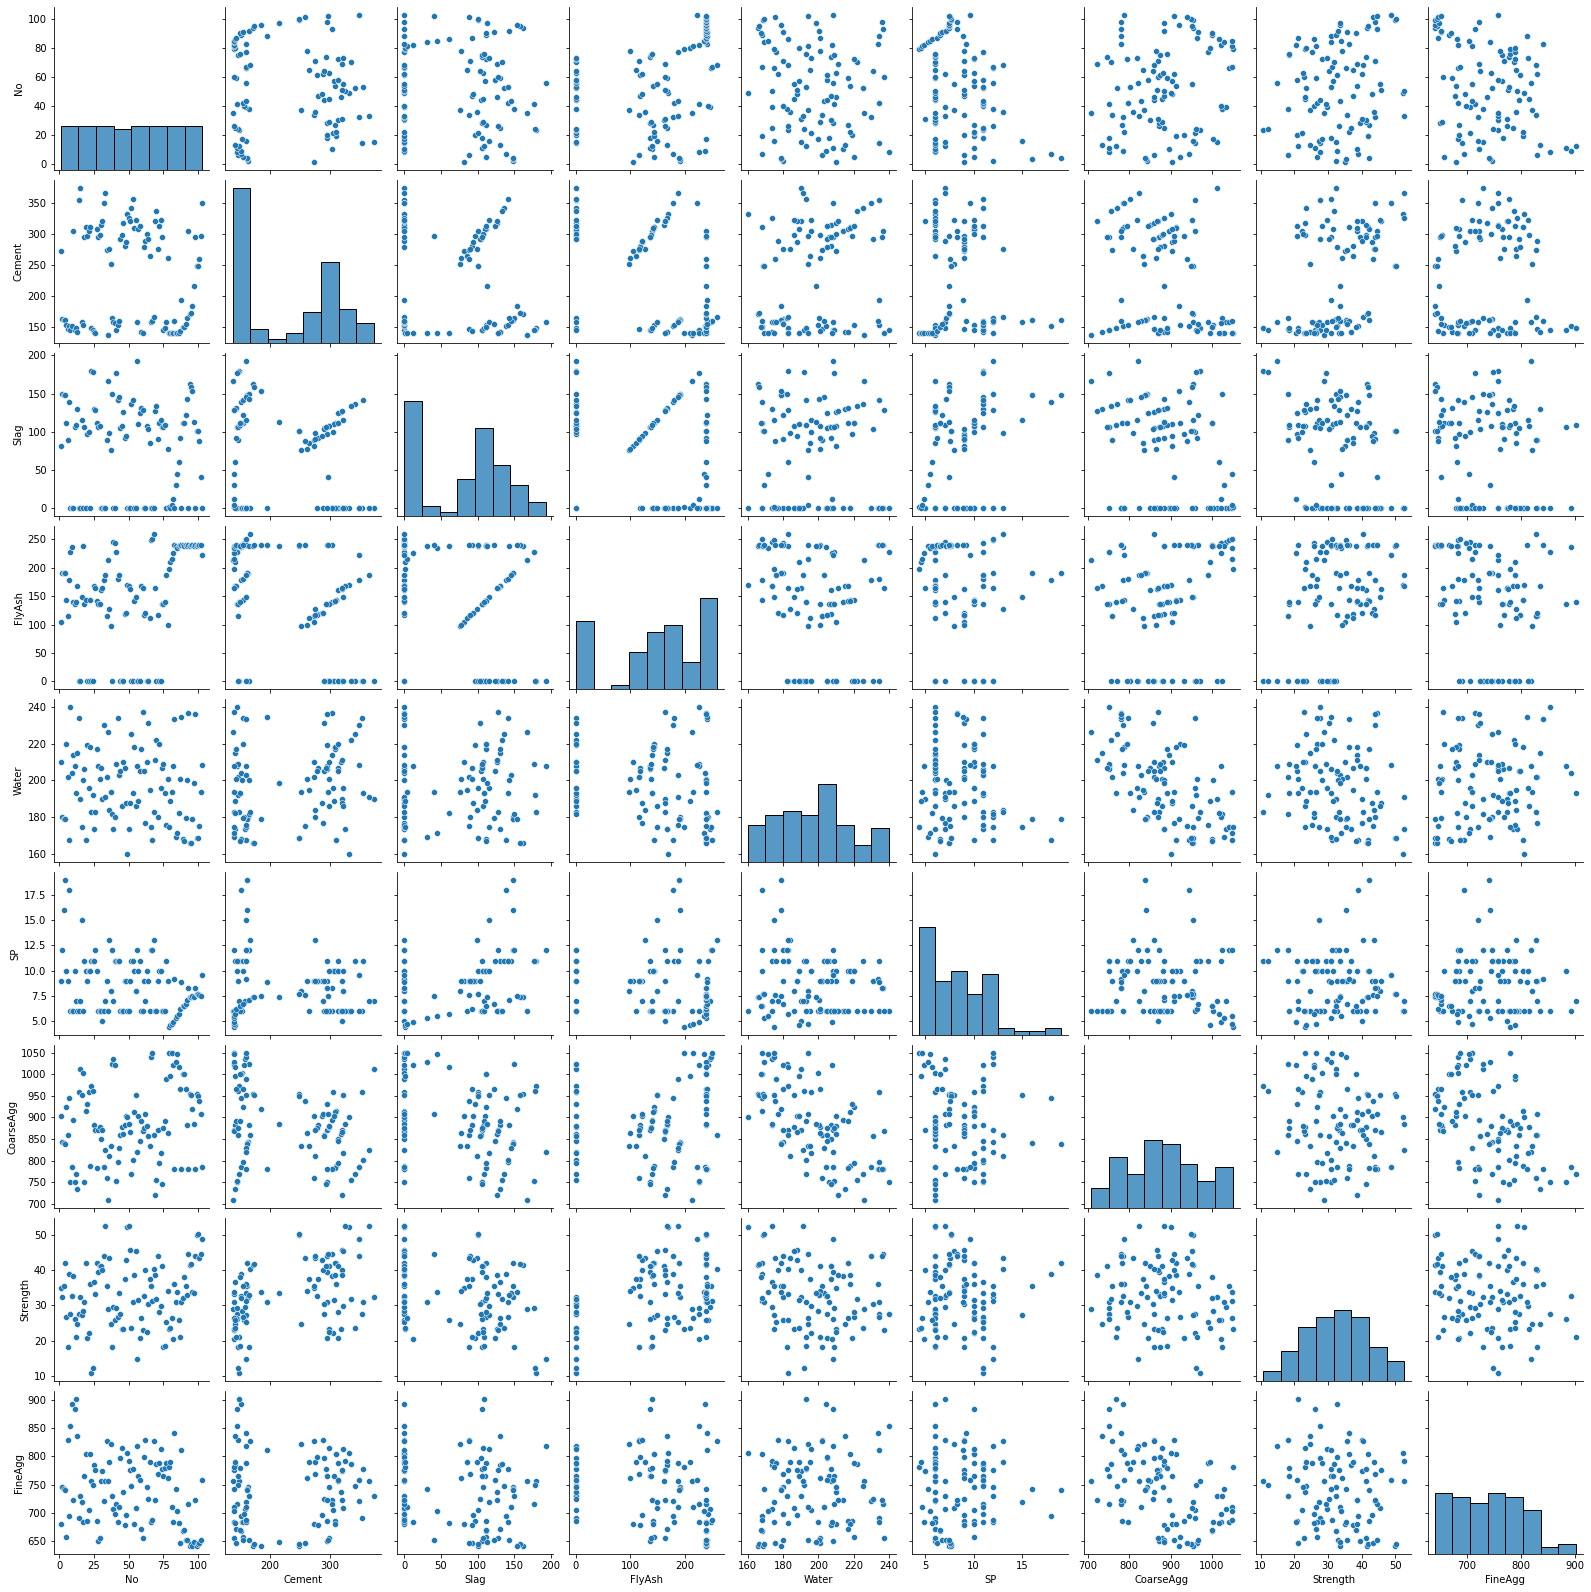

In [33]:

Y = ConcreteStrength['FineAgg']
X = ConcreteStrength[['No',
 'Cement',
 'Slag',
 'FlyAsh',
 'Water',
 'SP',
 'CoarseAgg',
 'Strength']]
X = sm.add_constant(X)

data = pd.concat([pd.DataFrame(X).iloc[:, 1:], Y], axis=1)
sns.pairplot(data)
plt.show()


In [34]:

# Let us round the corelation by 2 for precise reading
round(ConcreteStrength.corr(), 2)


,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
No,1.00,-0.03,-0.08,0.34,-0.14,-0.33,0.22,-0.31,0.19
Cement,-0.03,1.00,-0.24,-0.49,0.22,-0.11,-0.31,0.06,0.46
Slag,-0.08,-0.24,1.00,-0.32,-0.03,0.31,-0.22,-0.18,-0.33
FlyAsh,0.34,-0.49,-0.32,1.00,-0.24,-0.14,0.17,-0.28,0.41
Water,-0.14,0.22,-0.03,-0.24,1.00,-0.16,-0.60,0.11,-0.22
SP,-0.33,-0.11,0.31,-0.14,-0.16,1.00,-0.10,0.06,-0.02
CoarseAgg,0.22,-0.31,-0.22,0.17,-0.60,-0.10,1.00,-0.49,-0.15
FineAgg,-0.31,0.06,-0.18,-0.28,0.11,0.06,-0.49,1.00,-0.17
Strength,0.19,0.46,-0.33,0.41,-0.22,-0.02,-0.15,-0.17,1.00


In [35]:

X = ConcreteStrength.drop(['AirEntrain'], axis=1)
y = ConcreteStrength['AirEntrain']


In [36]:
X.head()

,No,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.990
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,32.272
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,35.450
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.080
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.820


In [37]:
y.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: AirEntrain, dtype: category
Categories (2, object): ['No', 'Yes']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.8064516129032258


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          No       0.89      0.81      0.85        21
         Yes       0.67      0.80      0.73        10

    accuracy                           0.81        31
   macro avg       0.78      0.80      0.79        31
weighted avg       0.82      0.81      0.81        31



In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          No       0.89      0.81      0.85        21
         Yes       0.67      0.80      0.73        10

    accuracy                           0.81        31
   macro avg       0.78      0.80      0.79        31
weighted avg       0.82      0.81      0.81        31

